In [1]:
from scipy.fft import fft2, ifft2, fftfreq, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt

In [2]:
λ = 0.0005
σ = 1
r0 = 0.5

In [3]:
# Para z = 100
z = 100
N = 1000
lim = 1
W = σ*np.sqrt(1+((λ*z)/(np.pi*σ**2))**2)
R = z*(1+((np.pi*σ**2)/(λ*z))**2)
ζ = np.arctan((λ*z)/(np.pi*σ**2)) 

In [4]:
x = np.linspace(-lim, lim, N)
Δx = x[1]-x[0]
y = np.linspace(-lim, lim, N)
Δy = y[1]-y[0]
X, Y = np.meshgrid(x, y)

In [5]:
circ = X**2+Y**2 < r0**2
U0 = np.exp(-(X**2+Y**2)/σ**2)*circ   # Campo de entrada
I0 = np.max(abs(U0)**2)               # Intensidad en el centro del haz (para normalizar)

In [6]:
fx = fftshift(fftfreq(N, Δx))
Δfx = fx[1]-fx[0]
fy = fftshift(fftfreq(N, Δy))
Δfy = fy[1]-fy[0]
Fx, Fy = np.meshgrid(fx, fy)

In [7]:
fftU = fftshift(fft2(U0))                        # Transformada del campo de entrada
α = 2*np.pi*np.sqrt(abs(1/λ**2-(Fx**2+Fy**2)))
H = np.exp(1j*α*z)                               # Función de transferencia

In [8]:
U = (ifft2(fftU*H))   # Campo numérico

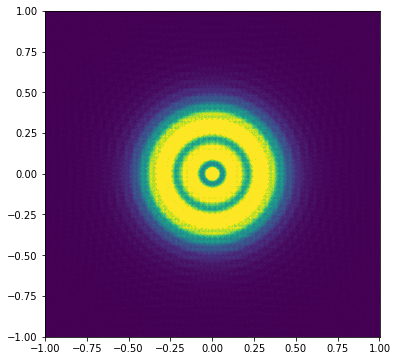

In [9]:
# Intensidad numérica para z = 100
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,abs(U)**2/I0,shading='auto', vmin=0., vmax=1.)
plt.show()

In [16]:
# Para z = 2000
z = 2000
W = σ*np.sqrt(1+((λ*z)/(np.pi*σ**2))**2)
R = z*(1+((np.pi*σ**2)/(λ*z))**2)
ζ = np.arctan((λ*z)/(np.pi*σ**2)) 

In [17]:
H = np.exp(1j*α*z)
U = (ifft2(fftU*H))

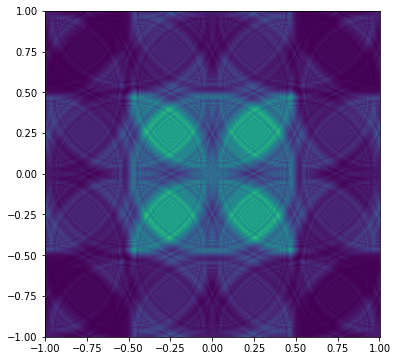

In [18]:
# Intensidad numérica para z = 2000
plt.figure(figsize=(6,6))
plt.pcolormesh(X,Y,abs(U)**2/I0,shading='auto', vmin=0., vmax=1.)
plt.show()

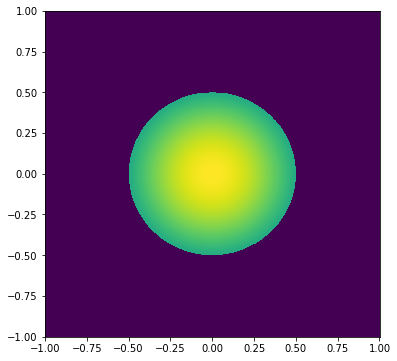

In [19]:
for z in range(0,10,10):
    W = σ*np.sqrt(1+((λ*z)/(np.pi*σ**2))**2)
    R = z*(1+((np.pi*σ**2)/(λ*z))**2) if z != 0 else np.inf
    ζ = np.arctan((λ*z)/(np.pi*σ**2))
    H = np.exp(1j*α*z)
    U = (ifft2(fftU*H))
    plt.figure(figsize=(6,6))
    plt.pcolormesh(X,Y,abs(U)**2/I0,shading='auto', vmin=0., vmax=1.)
    #name = 'gif/' + str(z) + '.png'
    #plt.savefig(name)

In [62]:
import glob
import cv2

In [63]:
img_array = []
for filename in sorted(glob.glob('gif/*.png')):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)

In [64]:
out = cv2.VideoWriter('Gaussian.avi',cv2.VideoWriter_fourcc(*'DIVX'), 5, size)

In [65]:
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [42]:
import os

In [57]:
for file in os.listdir("gif"):
    new = file.replace(".png", "")
    new = new.zfill(4)
    new = new + '.png'
    os.rename('gif/'+file, 'gif/'+new)